# Импортируем библиотеки и файл с вершинными словами

In [56]:
import pandas as pd
import pymorphy2
import matplotlib.pyplot as plt

words = pd.read_csv('wordsToExplore.csv', encoding='cp1251')
words.rename(columns={"Вершинное слово": "word"}, inplace=True)
morph = pymorphy2.MorphAnalyzer()

# Берём вершинные слова и подкрепляем к ним часть речи, начальную форму и морфологические признаки

In [100]:
df = pd.DataFrame(columns=['word', 'normal_form', 'tag', 'full_tag'])
for temp_word in words['word']:
    parsed_word = morph.parse(temp_word)[0]
    df_temp = pd.DataFrame({'word': temp_word,
                            'normal_form': parsed_word.normal_form, 
                            'tag': str(parsed_word.tag).split(',')[0],
                            'full_tag': str(parsed_word.tag)}, 
                            index=[0])
    df = df.append(df_temp, ignore_index=True)    
df

,word,normal_form,tag,full_tag
0,баба,баба,NOUN,"NOUN,anim,femn sing,nomn"
1,бегает,бегать,VERB,"VERB,impf,intr sing,3per,pres,indc"
2,бегал,бегать,VERB,"VERB,impf,intr masc,sing,past,indc"
3,бегали,бегать,VERB,"VERB,impf,intr plur,past,indc"
4,бегать,бегать,INFN,"INFN,impf,intr"
...,...,...,...,...
295,я,я,NPRO,"NPRO,1per sing,nomn"
296,я,я,NPRO,"NPRO,1per sing,nomn"
297,я,я,NPRO,"NPRO,1per sing,nomn"
298,я,я,NPRO,"NPRO,1per sing,nomn"


In [ ]:
df.to_excel('parsedWords.xlsx')

# Импортируем файл разметки

In [1]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('paper.csv', delimiter=',')

# ЗНАЧЕНИЕ: В разные стороны, во все концы

In [2]:
data

,Left context,Center,Punct,Right context,Title,Author,Birthday,Header,Created,Date,Century,Sphere,Type,Topic,Publication,Medium,Full context,Слово слева,Значение,Meaning number,Зависит ли от какого-то слова в предложении,POS,full_tag,Семантика глагола. К какой сем. группе он относится?,Вершинное слово: препозиция или постпозиция,Расстояние от вершинного слова,Значение (abs),Вершинное слово,Начальная форма,Прямое или переносное значение,Есть ли ещё,Full context.1
0,Мы глядь,туда,",",сюда!,"М. Н. Загоскин. Юрий Милославский, или русские...",М. Н. Загоскин,1789,"Юрий Милославский, или русские в 1612 году",1829,1829,IXX,художественная,роман,NaN,"М. Н. Загоскин. Юрий Милославский, или русские...",книга,"Мы глядь туда, сюда!",глядь,"В разные стороны, во все концы",1,Да,частица,PRCL,NaN,препозиция,0,0,глядь,глядь,Прямое,Отсутствует,"Мы глядь туда, сюда!"
1,Данила,туда,",",сюда.,В. Ф. Одоевский. Живописец (1839),В. Ф. Одоевский,1804,Живописец,1839,1839,IXX,художественная,повесть,NaN,Русские повести XIX века 20-х — 30-х годов. Том 2,книга,"Данила туда, сюда.",Данила,"В разные стороны, во все концы",1,Да,существительное,"NOUN, anim, masc, Name sing, gent",NaN,препозиция,0,0,Данила,данил,Переносное,Отсутствует,"Данила туда, сюда."
2,пустое слово; моя свободная воля идти,туда,",","сюда, куда хочу, и соображать, и",В. И. Даль. Бедовик (1839),В. И. Даль,1801,Бедовик,1839,1839,IXX,художественная,повесть,NaN,В. И. Даль (Казак Луганский). Повести. Рассказ...,книга,Поэтому судьба -- пустое слово; моя свободная ...,идти,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, intr",движения,препозиция,0,0,идти,идти,Прямое,Отсутствует,Поэтому судьба -- пустое слово; моя свободная ...
3,Я,туда,",",сюда...,В. А. Соллогуб. Тарантас (1845),В. А. Соллогуб,1814,Тарантас,1845,1845,IXX,художественная,повесть,NaN,В. А. Соллогуб. Избранная проза,книга,"Я туда, сюда...",Я,"В разные стороны, во все концы",1,Да,местоимение,"NPRO, 1per sing, nomn",NaN,препозиция,0,0,я,я,Прямое,Отсутствует,"Я туда, сюда..."
4,"я должен шуметь, браниться, допрашивать, ездить",туда,",",сюда... ты не выдержишь этой муки.,А. В. Дружинин. Полинька Сакс (1847),А. В. Дружинин,1824,Полинька Сакс,1847,1847,IXX,художественная,повесть,NaN,А. В. Дружинин. Полинька Сакс. Дневник,книга,"А на месте я должен шуметь, браниться, допраши...",ездить,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, intr",движения,препозиция,0,0,ездить,ездить,Прямое,Отсутствует,"А на месте я должен шуметь, браниться, допраши..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"Ну, на коньках ещё",туда-сюда,NaN,эти звезды катались.,Евгения Пищикова. Пятиэтажная Россия (2007) //...,Евгения Пищикова,NaN,Пятиэтажная Россия,2007,2007,XXI,художественная,очерк | цикл,NaN,«Русская Жизнь»,электронное издание,"Ну, на коньках ещё туда-сюда эти звезды катались.",ещё,"Ничего, сойдет",2,Да,существительное,"NOUN, anim, masc plur, loct",NaN,препозиция,1,1,на коньках,на конёк,Переносное,Присутствует,"Ну, на коньках ещё туда-сюда эти звезды катались."
296,"тогда, а уж тем более «воздух",туда,NaN,сюда гонять».,коллективный. Форум: Кредитование Ф-м физическ...,коллективный,NaN,Форум: Кредитование Ф-м физических лиц под зал...,2008,2008,XXI,электронная коммуникация,форум,"бизнес, коммерция, экономика, финансы",NaN,электронный текст,"И не надо будет никого обзывать тогда, а уж те...",воздух,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, tran",движения,постпозиция,0,0,гонять,гонять,Прямое,Отсутствует,"И не надо будет никого обзывать тогда, а уж те..."
297,"ворковать, кланяться и делать короткие пробежки",туда-сюда,",",шаркая при этом хвостом.,"Майя Валеева. Кусаки, рыжий бес // «Наука и жи...",Майя Валеева,NaN,"Кусаки, рыжий бес",2008,2008,XXI,художественная,повесть,NaN,«Наука и жизнь»,журнал,"При звуках песни он начинал ворковать, кланять...",пробежки,"В разные стороны, во все концы",1,Да,сущест

# Анализируем семантику глаголов

In [250]:
df_verb = data[data['Значение'] == 'В разные стороны, во все концы'].groupby(
    ['Семантика глагола. К какой сем. группе он относится?']
    )['Значение'].count()
df_verb = pd.DataFrame(df_verb)
df_verb.reset_index(inplace=True)
df_verb = df_verb.sort_values('Значение', ascending=False)
df_verb.reset_index(inplace=True)
df_verb = df_verb.drop('index', 1)
df_verb

,Семантика глагола. К какой сем. группе он относится?,Значение


In [ ]:
df_verb.to_excel('verbs.xlsx')

# Анализируем ЕЩЁ

In [243]:
df_verb = data[data['Значение'] == 'В разные стороны, во все концы'].groupby(
    ['Есть ли ещё']
    )['Значение'].count()
df_verb = pd.DataFrame(df_verb)
df_verb.reset_index(inplace=True)
df_verb = df_verb.sort_values('Значение', ascending=False)
df_verb.reset_index(inplace=True)
df_verb = df_verb.drop('index', 1)
df_verb

,Есть ли ещё,Значение
0,Отсутствует,234
1,Присутствует,6


# Получаем табличку сортировки и группировки значений по критерию full_tag

In [230]:
df_header = data[data['Значение'] == 'В разные стороны, во все концы'].groupby(
    ['Начальная форма']
    )['Значение'].count()
df_header = pd.DataFrame(df_header)
df_header.reset_index(inplace=True)
df_header = df_header.sort_values('Значение', ascending=False)
df_header.reset_index(inplace=True)
df_header = df_header.drop('index', 1)
df_header.head(20)

,Начальная форма,Значение
0,Слово отсутствует,26
1,сновать,16
2,ходить,10
3,бегать,9
4,носиться,7
5,ездить,7
6,мотаться,5
7,двигать,4
8,слоняться,4
9,метаться,4


In [225]:
df_header.to_excel('headers.xlsx')

# Анализируем начальные формы вершинного слова

In [249]:
df_tag = data[data['Значение'] == 'В разные стороны, во все концы'].groupby(
    'full_tag'
    )['Значение'].count()
df_tag = pd.DataFrame(df_tag)
df_tag.reset_index(inplace=True)
df_tag = df_tag.sort_values('Значение', ascending=False)
df_tag.reset_index(inplace=True)
df_tag = df_tag.drop('index', 1)
df_tag

,full_tag,Значение
0,"INFN, impf, intr",27
1,Слово отсутствует,26
2,"VERB, impf, intr masc, sing, past, indc",20
3,"VERB, impf, intr plur, 3per, pres, indc",19
4,"VERB, perf, intr masc, sing, past, indc",15
5,"VERB, impf, intr sing, 3per, pres, indc",15
6,"VERB, impf, intr plur, past, indc",12
7,"INFN, impf, tran",12
8,"VERB, perf, tran masc, sing, past, indc",7
9,"VERB, impf, tran plur, 3per, pres, indc",7


# Импортируем табличку-справочник с тегами

In [167]:
data_tag = pd.read_csv('tag_table.csv', delimiter=';', encoding='cp1251')

# Заменяем значения таблички на русские

In [210]:
word = 'NPRO, 1per, sing, nomn' #заменяем значения на те, что берём из df_tag

try:
    word = word.replace('intr', 'intr,')
    word = word.split(', ')
    array = ''
    for i in word:
        array += data_tag[data_tag['POST'] == f'{i}']['часть речи'].values[0] + ', '
    print(array)
except IndexError:
    word = word.split(', ')
    array = ''
    for i in word:
        array += data_tag[data_tag['POST'] == f'{i}']['часть речи'].values[0] + ', '
    print(array)

местоимение-существительное, 1 лицо, единственное число, именительный падеж, 


In [170]:
data_tag[data_tag['POST'] == 'intr']

,POST,ЧР,часть речи,Parent
66,intr,неперех,непереходный,TRns


# ЗНАЧЕНИЕ: Ничего, сойдет

In [251]:
data

,Left context,Center,Punct,Right context,Title,Author,Birthday,Header,Created,Date,Century,Sphere,Type,Topic,Publication,Medium,Full context,Слово слева,Значение,Meaning number,Зависит ли от какого-то слова в предложении,POS,full_tag,Семантика глагола. К какой сем. группе он относится?,Вершинное слово: препозиция или постпозиция,Расстояние от вершинного слова,Значение (abs),Вершинное слово,Начальная форма,Прямое или переносное значение,Есть ли ещё,Full context.1
0,Мы глядь,туда,",",сюда!,"М. Н. Загоскин. Юрий Милославский, или русские...",М. Н. Загоскин,1789,"Юрий Милославский, или русские в 1612 году",1829,1829,IXX,художественная,роман,NaN,"М. Н. Загоскин. Юрий Милославский, или русские...",книга,"Мы глядь туда, сюда!",глядь,"В разные стороны, во все концы",1,Да,частица,PRCL,NaN,препозиция,0,0,глядь,глядь,Прямое,Отсутствует,"Мы глядь туда, сюда!"
1,Данила,туда,",",сюда.,В. Ф. Одоевский. Живописец (1839),В. Ф. Одоевский,1804,Живописец,1839,1839,IXX,художественная,повесть,NaN,Русские повести XIX века 20-х — 30-х годов. Том 2,книга,"Данила туда, сюда.",Данила,"В разные стороны, во все концы",1,Да,существительное,"NOUN, anim, masc, Name sing, gent",NaN,препозиция,0,0,Данила,данил,Переносное,Отсутствует,"Данила туда, сюда."
2,пустое слово; моя свободная воля идти,туда,",","сюда, куда хочу, и соображать, и",В. И. Даль. Бедовик (1839),В. И. Даль,1801,Бедовик,1839,1839,IXX,художественная,повесть,NaN,В. И. Даль (Казак Луганский). Повести. Рассказ...,книга,Поэтому судьба -- пустое слово; моя свободная ...,идти,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, intr",движения,препозиция,0,0,идти,идти,Прямое,Отсутствует,Поэтому судьба -- пустое слово; моя свободная ...
3,Я,туда,",",сюда...,В. А. Соллогуб. Тарантас (1845),В. А. Соллогуб,1814,Тарантас,1845,1845,IXX,художественная,повесть,NaN,В. А. Соллогуб. Избранная проза,книга,"Я туда, сюда...",Я,"В разные стороны, во все концы",1,Да,местоимение,"NPRO, 1per sing, nomn",NaN,препозиция,0,0,я,я,Прямое,Отсутствует,"Я туда, сюда..."
4,"я должен шуметь, браниться, допрашивать, ездить",туда,",",сюда... ты не выдержишь этой муки.,А. В. Дружинин. Полинька Сакс (1847),А. В. Дружинин,1824,Полинька Сакс,1847,1847,IXX,художественная,повесть,NaN,А. В. Дружинин. Полинька Сакс. Дневник,книга,"А на месте я должен шуметь, браниться, допраши...",ездить,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, intr",движения,препозиция,0,0,ездить,ездить,Прямое,Отсутствует,"А на месте я должен шуметь, браниться, допраши..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"Ну, на коньках ещё",туда-сюда,NaN,эти звезды катались.,Евгения Пищикова. Пятиэтажная Россия (2007) //...,Евгения Пищикова,NaN,Пятиэтажная Россия,2007,2007,XXI,художественная,очерк | цикл,NaN,«Русская Жизнь»,электронное издание,"Ну, на коньках ещё туда-сюда эти звезды катались.",ещё,"Ничего, сойдет",2,Да,существительное,"NOUN, anim, masc plur, loct",NaN,препозиция,1,1,на коньках,на конёк,Переносное,Присутствует,"Ну, на коньках ещё туда-сюда эти звезды катались."
296,"тогда, а уж тем более «воздух",туда,NaN,сюда гонять».,коллективный. Форум: Кредитование Ф-м физическ...,коллективный,NaN,Форум: Кредитование Ф-м физических лиц под зал...,2008,2008,XXI,электронная коммуникация,форум,"бизнес, коммерция, экономика, финансы",NaN,электронный текст,"И не надо будет никого обзывать тогда, а уж те...",воздух,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, tran",движения,постпозиция,0,0,гонять,гонять,Прямое,Отсутствует,"И не надо будет никого обзывать тогда, а уж те..."
297,"ворковать, кланяться и делать короткие пробежки",туда-сюда,",",шаркая при этом хвостом.,"Майя Валеева. Кусаки, рыжий бес // «Наука и жи...",Майя Валеева,NaN,"Кусаки, рыжий бес",2008,2008,XXI,художественная,повесть,NaN,«Наука и жизнь»,журнал,"При звуках песни он начинал ворковать, кланять...",пробежки,"В разные стороны, во все концы",1,Да,сущест

# Анализируем зависимость от других слов

In [257]:
df_pos = data[data['Значение'] == 'Ничего, сойдет '].groupby(
    ['Зависит ли от какого-то слова в предложении']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,Зависит ли от какого-то слова в предложении,Значение
0,Да,40
1,Нет,4


# Анализируем позиционирование

In [261]:
df_pos = data[data['Значение'] == 'Ничего, сойдет '].groupby(
    ['Вершинное слово: препозиция или постпозиция']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,Вершинное слово: препозиция или постпозиция,Значение
0,препозиция,39
1,Слово отсутствует,4
2,постпозиция,1


# Анализируем позиционирование в числах

In [260]:
df_pos = data[data['Значение'] == 'Ничего, сойдет '].groupby(
    ['Расстояние от вершинного слова']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,Расстояние от вершинного слова,Значение
0,1,23
1,0,13
2,Слово отсутствует,4
3,2,2
4,3,2


# Анализируем части речи

In [256]:
df_pos = data[data['Значение'] == 'Ничего, сойдет '].groupby(
    ['POS']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,POS,Значение
0,существительное,21
1,местоимение,6
2,Слово отсутствует,4
3,глагол (личная форма),4
4,глагол (инфинитив),3
5,частица,3
6,наречие,2
7,предлог,1


# Анализируем ЕЩЁ

In [264]:
df_verb = data[data['Значение'] == 'Ничего, сойдет '].groupby(
    ['Есть ли ещё']
    )['Значение'].count()
df_verb = pd.DataFrame(df_verb)
df_verb.reset_index(inplace=True)
df_verb = df_verb.sort_values('Значение', ascending=False)
df_verb.reset_index(inplace=True)
df_verb = df_verb.drop('index', 1)
df_verb

,Есть ли ещё,Значение
0,Присутствует,26
1,Отсутствует,18


# Получаем табличку сортировки и группировки значений по критерию full_tag

In [268]:
df_header = data[data['Значение'] == 'Ничего, сойдет '].groupby(
    ['Начальная форма']
    )['Значение'].count()
df_header = pd.DataFrame(df_header)
df_header.reset_index(inplace=True)
df_header = df_header.sort_values('Значение', ascending=False)
df_header.reset_index(inplace=True)
df_header = df_header.drop('index', 1)
df_header

,Начальная форма,Значение
0,Слово отсутствует,4
1,я,3
2,это,2
3,он,2
4,быть,2
5,было б,1
6,получать,1
7,она,1
8,переводить,1
9,по линия,1


In [225]:
df_header.to_excel('headers_2.xlsx')

# Анализируем начальные формы вершинного слова

In [266]:
df_tag = data[data['Значение'] == 'Ничего, сойдет '].groupby(
    'full_tag'
    )['Значение'].count()
df_tag = pd.DataFrame(df_tag)
df_tag.reset_index(inplace=True)
df_tag = df_tag.sort_values('Значение', ascending=False)
df_tag.reset_index(inplace=True)
df_tag = df_tag.drop('index', 1)
df_tag

,full_tag,Значение
0,Слово отсутствует,4
1,"NOUN, anim, masc sing, nomn",3
2,PRCL,3
3,"NPRO, 1per sing, nomn",3
4,"NOUN, inan, masc sing, nomn",3
5,"VERB, impf, intr neut, sing, past, indc",2
6,"NPRO, masc, 3per, Anph sing, nomn",2
7,ADVB,2
8,"NOUN, anim, femn sing, nomn",2
9,"NOUN, anim, masc sing, accs",1


# Заменяем значения таблички на русские

In [167]:
data_tag = pd.read_csv('tag_table.csv', delimiter=';', encoding='cp1251')

In [286]:
word = 'NOUN, anim, masc, plur, accs'

try:
    word = word.replace('intr', 'intr,')
    word = word.split(', ')
    array = ''
    for i in word:
        array += data_tag[data_tag['POST'] == f'{i}']['часть речи'].values[0] + ', '
    print(array)
except IndexError:
    word = word.split(', ')
    array = ''
    for i in word:
        array += data_tag[data_tag['POST'] == f'{i}']['часть речи'].values[0] + ', '
    print(array)

имя существительное, одушевлённое, мужской род, множественное число, винительный падеж, 


In [170]:
data_tag[data_tag['POST'] == 'intr']

,POST,ЧР,часть речи,Parent
66,intr,неперех,непереходный,TRns


# ЗНАЧЕНИЕ: Таким или иным образом

In [289]:
data = data.replace({'Значение':{'То так, то наоборот ': 'Таким или иным образом'}})
data

,Left context,Center,Punct,Right context,Title,Author,Birthday,Header,Created,Date,Century,Sphere,Type,Topic,Publication,Medium,Full context,Слово слева,Значение,Meaning number,Зависит ли от какого-то слова в предложении,POS,full_tag,Семантика глагола. К какой сем. группе он относится?,Вершинное слово: препозиция или постпозиция,Расстояние от вершинного слова,Значение (abs),Вершинное слово,Начальная форма,Прямое или переносное значение,Есть ли ещё,Full context.1
0,Мы глядь,туда,",",сюда!,"М. Н. Загоскин. Юрий Милославский, или русские...",М. Н. Загоскин,1789,"Юрий Милославский, или русские в 1612 году",1829,1829,IXX,художественная,роман,NaN,"М. Н. Загоскин. Юрий Милославский, или русские...",книга,"Мы глядь туда, сюда!",глядь,"В разные стороны, во все концы",1,Да,частица,PRCL,NaN,препозиция,0,0,глядь,глядь,Прямое,Отсутствует,"Мы глядь туда, сюда!"
1,Данила,туда,",",сюда.,В. Ф. Одоевский. Живописец (1839),В. Ф. Одоевский,1804,Живописец,1839,1839,IXX,художественная,повесть,NaN,Русские повести XIX века 20-х — 30-х годов. Том 2,книга,"Данила туда, сюда.",Данила,"В разные стороны, во все концы",1,Да,существительное,"NOUN, anim, masc, Name sing, gent",NaN,препозиция,0,0,Данила,данил,Переносное,Отсутствует,"Данила туда, сюда."
2,пустое слово; моя свободная воля идти,туда,",","сюда, куда хочу, и соображать, и",В. И. Даль. Бедовик (1839),В. И. Даль,1801,Бедовик,1839,1839,IXX,художественная,повесть,NaN,В. И. Даль (Казак Луганский). Повести. Рассказ...,книга,Поэтому судьба -- пустое слово; моя свободная ...,идти,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, intr",движения,препозиция,0,0,идти,идти,Прямое,Отсутствует,Поэтому судьба -- пустое слово; моя свободная ...
3,Я,туда,",",сюда...,В. А. Соллогуб. Тарантас (1845),В. А. Соллогуб,1814,Тарантас,1845,1845,IXX,художественная,повесть,NaN,В. А. Соллогуб. Избранная проза,книга,"Я туда, сюда...",Я,"В разные стороны, во все концы",1,Да,местоимение,"NPRO, 1per sing, nomn",NaN,препозиция,0,0,я,я,Прямое,Отсутствует,"Я туда, сюда..."
4,"я должен шуметь, браниться, допрашивать, ездить",туда,",",сюда... ты не выдержишь этой муки.,А. В. Дружинин. Полинька Сакс (1847),А. В. Дружинин,1824,Полинька Сакс,1847,1847,IXX,художественная,повесть,NaN,А. В. Дружинин. Полинька Сакс. Дневник,книга,"А на месте я должен шуметь, браниться, допраши...",ездить,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, intr",движения,препозиция,0,0,ездить,ездить,Прямое,Отсутствует,"А на месте я должен шуметь, браниться, допраши..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"Ну, на коньках ещё",туда-сюда,NaN,эти звезды катались.,Евгения Пищикова. Пятиэтажная Россия (2007) //...,Евгения Пищикова,NaN,Пятиэтажная Россия,2007,2007,XXI,художественная,очерк | цикл,NaN,«Русская Жизнь»,электронное издание,"Ну, на коньках ещё туда-сюда эти звезды катались.",ещё,"Ничего, сойдет",2,Да,существительное,"NOUN, anim, masc plur, loct",NaN,препозиция,1,1,на коньках,на конёк,Переносное,Присутствует,"Ну, на коньках ещё туда-сюда эти звезды катались."
296,"тогда, а уж тем более «воздух",туда,NaN,сюда гонять».,коллективный. Форум: Кредитование Ф-м физическ...,коллективный,NaN,Форум: Кредитование Ф-м физических лиц под зал...,2008,2008,XXI,электронная коммуникация,форум,"бизнес, коммерция, экономика, финансы",NaN,электронный текст,"И не надо будет никого обзывать тогда, а уж те...",воздух,"В разные стороны, во все концы",1,Да,глагол (инфинитив),"INFN, impf, tran",движения,постпозиция,0,0,гонять,гонять,Прямое,Отсутствует,"И не надо будет никого обзывать тогда, а уж те..."
297,"ворковать, кланяться и делать короткие пробежки",туда-сюда,",",шаркая при этом хвостом.,"Майя Валеева. Кусаки, рыжий бес // «Наука и жи...",Майя Валеева,NaN,"Кусаки, рыжий бес",2008,2008,XXI,художественная,повесть,NaN,«Наука и жизнь»,журнал,"При звуках песни он начинал ворковать, кланять...",пробежки,"В разные стороны, во все концы",1,Да,сущест

# Анализируем зависимость от других слов

In [293]:
df_pos = data[data['Значение'] == 'Таким или иным образом'].groupby(
    ['Зависит ли от какого-то слова в предложении']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,Зависит ли от какого-то слова в предложении,Значение
0,Нет,11
1,Да,5


# Анализируем позиционирование

In [294]:
df_pos = data[data['Значение'] == 'Таким или иным образом'].groupby(
    ['Вершинное слово: препозиция или постпозиция']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,Вершинное слово: препозиция или постпозиция,Значение
0,Слово отсутствует,11
1,препозиция,4
2,постпозиция,1


# Анализируем позиционирование в числах

In [295]:
df_pos = data[data['Значение'] == 'Таким или иным образом'].groupby(
    ['Расстояние от вершинного слова']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,Расстояние от вершинного слова,Значение
0,Слово отсутствует,11
1,0,2
2,1,1
3,2,1
4,7,1


# Анализируем части речи

In [298]:
df_pos = data[data['Значение'] == 'Таким или иным образом'].groupby(
    ['POS']
    )['Значение'].count()
df_pos = pd.DataFrame(df_pos)
df_pos.reset_index(inplace=True)
df_pos = df_pos.sort_values('Значение', ascending=False)
df_pos.reset_index(inplace=True)
df_pos = df_pos.drop('index', 1)
df_pos

,POS,Значение
0,Слово отсутствует,11
1,существительное,2
2,глагол (инфинитив),1
3,глагол (личная форма),1
4,местоимение,1


# Анализируем ЕЩЁ

In [300]:
df_verb = data[data['Значение'] == 'Таким или иным образом'].groupby(
    ['Есть ли ещё']
    )['Значение'].count()
df_verb = pd.DataFrame(df_verb)
df_verb.reset_index(inplace=True)
df_verb = df_verb.sort_values('Значение', ascending=False)
df_verb.reset_index(inplace=True)
df_verb = df_verb.drop('index', 1)
df_verb

,Есть ли ещё,Значение
0,Отсутствует,16


# Получаем табличку сортировки и группировки значений по критерию full_tag

In [301]:
df_header = data[data['Значение'] == 'Таким или иным образом'].groupby(
    ['Начальная форма']
    )['Значение'].count()
df_header = pd.DataFrame(df_header)
df_header.reset_index(inplace=True)
df_header = df_header.sort_values('Значение', ascending=False)
df_header.reset_index(inplace=True)
df_header = df_header.drop('index', 1)
df_header

,Начальная форма,Значение
0,Слово отсутствует,11
1,качание,1
2,расспрашивать,1
3,расход,1
4,резать,1
5,я,1


In [225]:
df_header.to_excel('headers_2.xlsx')

# Анализируем начальные формы вершинного слова

In [302]:
df_tag = data[data['Значение'] == 'Таким или иным образом'].groupby(
    'full_tag'
    )['Значение'].count()
df_tag = pd.DataFrame(df_tag)
df_tag.reset_index(inplace=True)
df_tag = df_tag.sort_values('Значение', ascending=False)
df_tag.reset_index(inplace=True)
df_tag = df_tag.drop('index', 1)
df_tag

,full_tag,Значение
0,Слово отсутствует,11
1,"INFN, impf, tran",1
2,"NOUN, inan, masc plur, nomn",1
3,"NOUN, inan, neut sing, nomn",1
4,"NPRO, 1per sing, nomn",1
5,"VERB, impf, tran masc, sing, past, indc",1


# Заменяем значения таблички на русские

In [167]:
data_tag = pd.read_csv('tag_table.csv', delimiter=';', encoding='cp1251')

In [286]:
word = 'NOUN, anim, masc, plur, accs'

try:
    word = word.replace('intr', 'intr,')
    word = word.split(', ')
    array = ''
    for i in word:
        array += data_tag[data_tag['POST'] == f'{i}']['часть речи'].values[0] + ', '
    print(array)
except IndexError:
    word = word.split(', ')
    array = ''
    for i in word:
        array += data_tag[data_tag['POST'] == f'{i}']['часть речи'].values[0] + ', '
    print(array)

имя существительное, одушевлённое, мужской род, множественное число, винительный падеж, 


In [170]:
data_tag[data_tag['POST'] == 'intr']

,POST,ЧР,часть речи,Parent
66,intr,неперех,непереходный,TRns


# Строим графики

In [40]:
meanings = ['В разные стороны, во все концы', 'Ничего, сойдет ', 'Таким или иным образом', 'То так, то наоборот ']

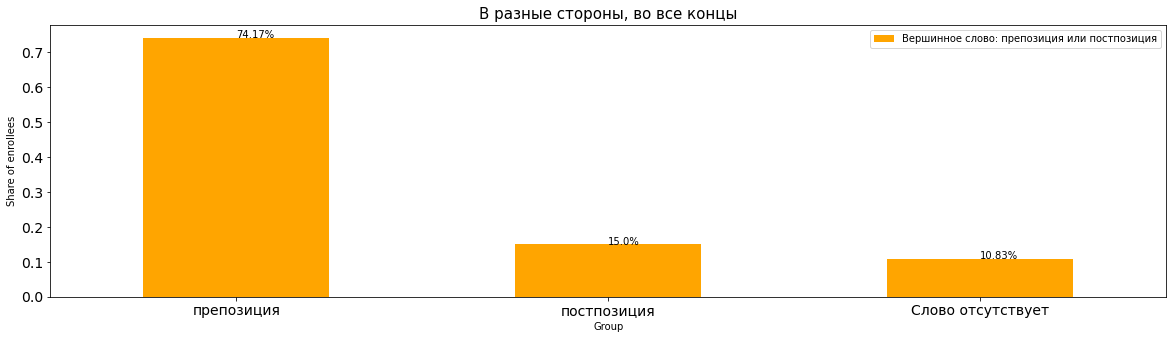

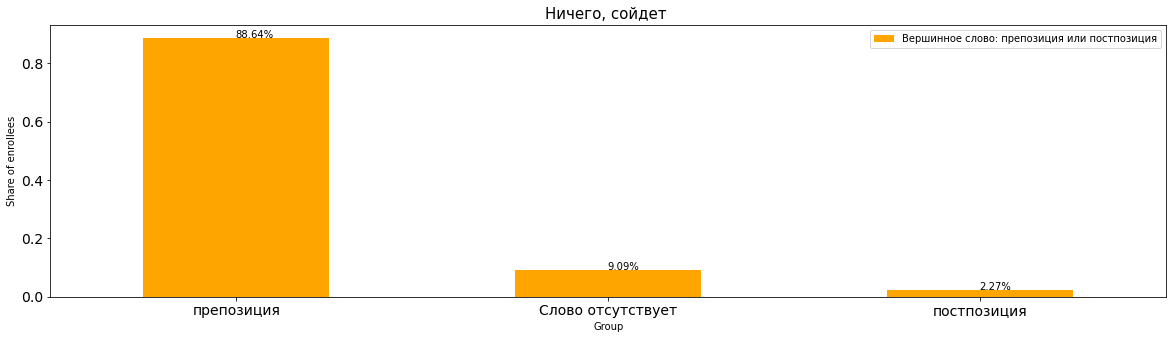

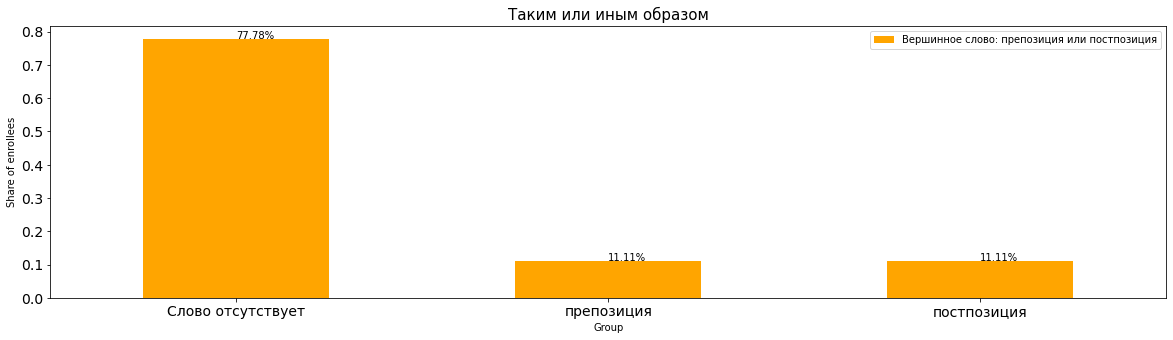

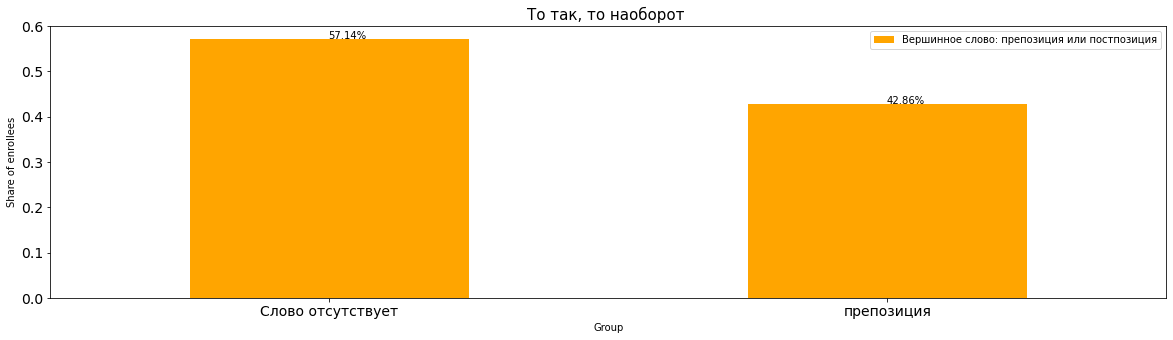

In [63]:
for loop_meaning in meanings:
    data_bar = data[data['Значение'] == f'{loop_meaning}']['Вершинное слово: препозиция или постпозиция'].value_counts(normalize = True)

    data_bar.plot(
        kind='bar', rot=0, color = 'orange', fontsize = 14, figsize = (20,5)
    )
    plt.title(f'{loop_meaning}', fontsize = 15)
    plt.legend()
    plt.xlabel('Group')
    plt.ylabel('Share of enrollees')

    for i, (x,y) in enumerate(data_bar.to_dict().items()):
        plt.text(i-.002, y, s=str(round(y*100, 2))+'%')
    plt.show()

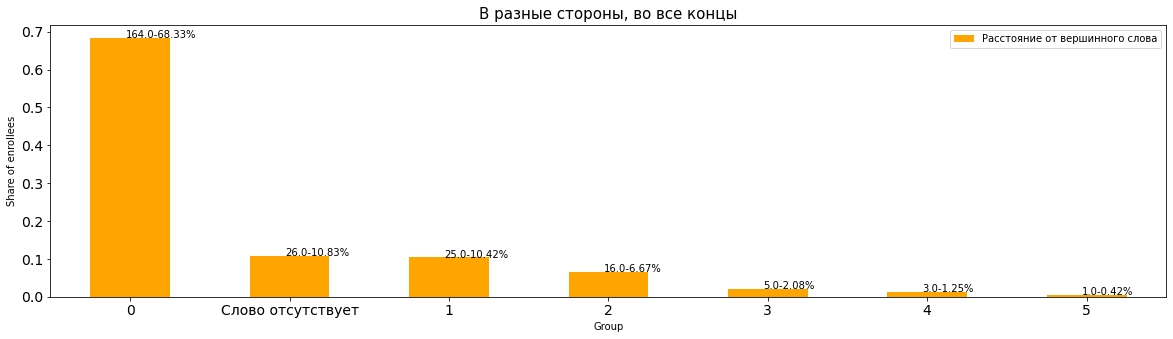

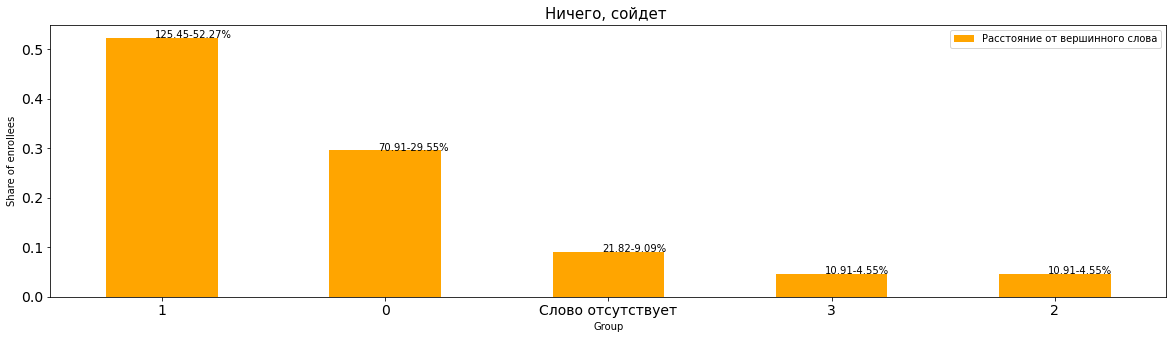

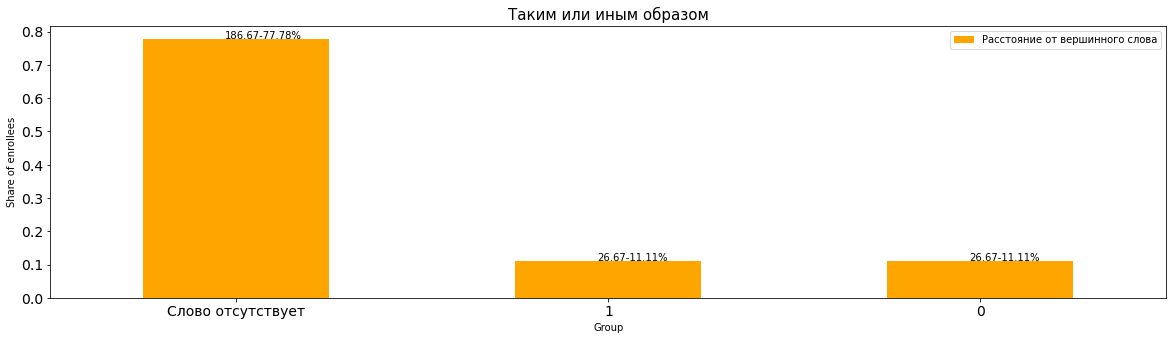

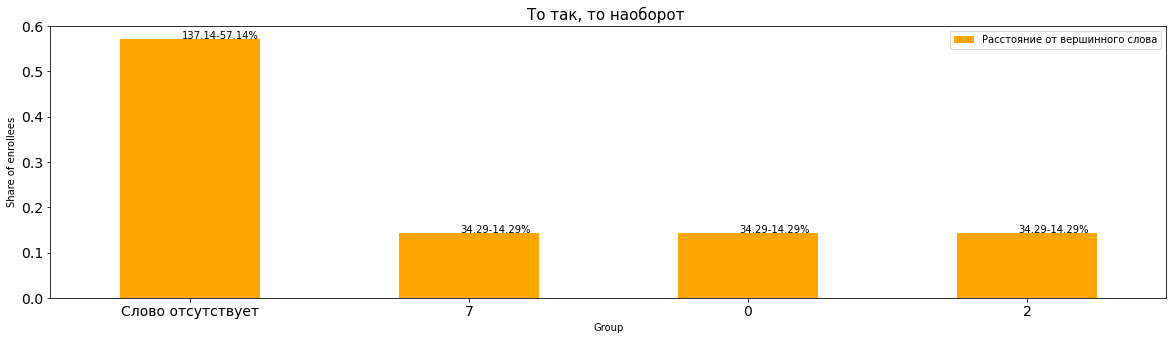

In [73]:
for loop_meaning in meanings:
    data_bar = data[data['Значение'] == f'{loop_meaning}']['Расстояние от вершинного слова'].value_counts(normalize = True)

    data_bar.plot(
        kind='bar', rot=0, color = 'orange', fontsize = 14, figsize = (20,5)
    )
    plt.title(f'{loop_meaning}', fontsize = 15)
    plt.legend()
    plt.xlabel('Group')
    plt.ylabel('Share of enrollees')

    for i, (x,y) in enumerate(data_bar.to_dict().items()):
        plt.text(i-.03, y, s=(str(round(y*240, 2))+'-'+str(round(y*100, 2)))+'%')
    plt.show()